참고:혼자 공부하는 머신러닝 + 딥러닝(한빛미디어)

# K-최근접 이웃 회귀

* k-nn 알고리즘의 방식으로 회귀 예측값을 반환
* k-nn은 예측값으로 분류를 k-nn 회귀는 `연속적인 값`을 반환한다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                     perch_weight,
                                                                     random_state = 42)

In [4]:
train_input.shape

(42,)

* `reshpe()`: 배열의 크기를 바꿀 수 있는 매서드

모델에는 2차원 데이터가 들어가야 하므로 1차원 데이터인 train_input을 reshape을 통해 2차원으로 만들어준다.

In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape

(42, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

* `결정계수`(R²: Coefficient of determinateion)


https://m.blog.naver.com/tlrror9496/222055889079


https://m.blog.naver.com/pmw9440/221822183325


In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
test_prediction = knr.predict(test_input)


# 평균 절댓값 오차
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과적합 문제

* `과대적합`: 훈련 데이터에만 잘 맞는 모델일 때 과대적합이 일어난다. 새로운 데이터가 들어오면 해당 데이터에 관한 예측 정확도는 떨어진다

* `과소적합`: 훈련 데이터, 테스트 데이터 모두에 대해 예측 정확도가 나빠지는 문제임. 해당 문제는 너무 적은 데이터셋이 훈련됐을때 일어날 수 있다.

In [10]:
print(f"테스트 데이터에 대한 예측 정확도: {knr.score(test_input, test_target)}")
print(f"훈련 데이터에 대한 예측 정확도:{knr.score(train_input, train_target)}")

테스트 데이터에 대한 예측 정확도: 0.992809406101064
훈련 데이터에 대한 예측 정확도:0.9698823289099254


다음의 모델은 테스트 데이터에 대한 예측력이 높으므로 과소적합이 발생한다고 볼 수 있다.

이때, 모델을 더 복잡하게 만들면 과소적합 문제를 해소할 수 있다 k-nnr에서는 이웃의 개수 k를 줄이는 것이 모델을 더 복잡하게 만드는 방법 중 하나이다. 

In [11]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(f"테스트 데이터에 대한 예측 정확도:", knr.score(test_input, test_target))
print(f"훈련 데이터에 대한 예측 정확도:", knr.score(train_input, train_target))

테스트 데이터에 대한 예측 정확도: 0.9746459963987609
훈련 데이터에 대한 예측 정확도: 0.9804899950518966


# k-nn 회귀의 문제점

* 근사한 데이터 타겟값으로 예측값을 반환하기 때문에 정확한 예측이 이뤄지지 않는 경우가 있다.
* 즉, 훈련 세트 범위를 넘어가는 샘플의 값을 예측할 수 없다.


###  길이 50cm 무게 1500인 생선이 있을때, 모델은 이 생선의 무게를 얼마로 예측할지

In [12]:
distances, indexes = knr.kneighbors([[50]])
print(knr.kneighbors([[50]])) # 회귀 예측값 계산에 사용된 근사한 이웃값
print(indexes)

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))
[[34  8 14]]


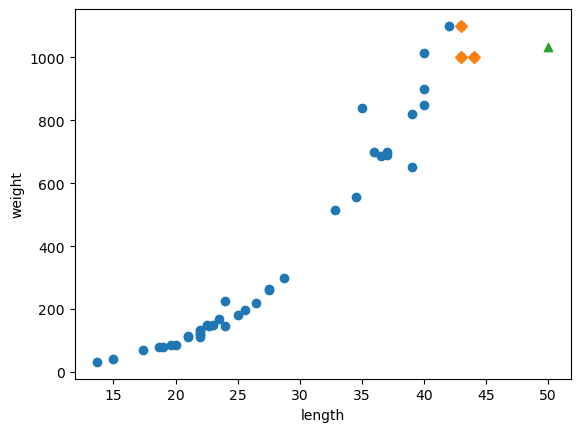

In [13]:
plt.scatter(train_input,train_target)

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker ="D")

# 50cm 농어 데이터
plt.scatter(50,1033, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [14]:
print("이웃값의 평균: ",np.mean(train_target[indexes]))
print("모델의 예측값: ", knr.predict([[50]]))

이웃값의 평균:  1033.3333333333333
모델의 예측값:  [1033.33333333]


다음과 같이 실제값이 1500인데도 불구하고 k-nn 회귀는 근접한 이웃값의 평균을 예측값으로 반환하기 때문에훈련 세트범위를 넘어가는 데이터에 대해서는 예측 성능이 떨어진다.